# Overlap of WGCNA and DEGs
## Phase 2

In [wgcna_p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/wgcna/wgcna_p2.ipynb), I identified modules that are significantly associated with phase 1 and 2 treatments. I'm curious if genes in those modules have any overlap with DEGs identified when I isolated one treatment aspect (i.e., isolate phase 1 temp to compare ambient vs warm, regardless of/ignoring phase 1 DO and phase 2 temp and DO treatments)

## 0. load libraries

In [2]:
library(tidyverse)
library(UpSetR)

## 1. load data

### DEGs
generated from [deseq_p2.v.p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/deseq_p2.v.p2.ipynb)

In [6]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/isolated_treatments',
    pattern = '.csv$',
    full.names = TRUE
    )

names(files) <- tools::file_path_sans_ext(basename(files))
deg_files <- lapply(files, read.csv)
names(deg_files)

[1] "p1_DO"   "p1_temp" "p2_DO"   "p2_temp"

In [8]:
# define thresholds
p_thresh <- 0.05
lfc_thresh <- 1

# filter dfs to pull out DEGs
deg_list <- lapply(deg_files, function(df) {
  df %>%
    filter(
      padj <= p_thresh,              
      abs(log2FoldChange) >= lfc_thresh
    ) 
})

# check number of DEGs in each df 
lapply(deg_list, nrow)

$p1_DO
[1] 55

$p1_temp
[1] 27

$p2_DO
[1] 67

$p2_temp
[1] 167

### module genes
generated from [wgcna_p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/wgcna/wgcna_p2.ipynb)

In [11]:
module.genes <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/wgcna/p2.wgcna_GeneInfo.csv')
dim(module.genes) # 14528 genes across 14 modules
head(module.genes, 3)

[1] 14528    49

,Gene,GO.terms,ModuleColor,Combo_treatments.GS.both_both,Combo_treatments.GS.both_warm,Combo_treatments.GS.both_control,Combo_treatments.GS.both_hypoxic,Combo_treatments.GS.control_control,Combo_treatments.GS.control_hypoxic,Combo_treatments.GS.control_both,⋯,MMcyan,MMbrown,MMyellow,MMturquoise,MMpink,MMblack,MMtan,MMsalmon,MMgreenyellow,MMmagenta
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,COX1,GO:0004129; GO:0005743; GO:0006119; GO:0020037; GO:0045277; GO:0046872,brown,0.01890862,-0.05654569,-0.07639120,-0.15771421,-0.07403373,-0.01311223,0.08848199,⋯,0.1722356,0.5297275,0.2700327,0.2759990,-0.02328820,-0.04901975,0.03370438,-0.03980008,0.13300933,0.09993804
2,COX2,GO:0004129; GO:0005507; GO:0005743; GO:0070469,brown,-0.02712349,-0.07633552,-0.04636546,-0.07633242,0.01938493,-0.11795616,0.17711563,⋯,0.2062443,0.6096609,0.1083271,0.2422961,-0.05538884,-0.03260110,-0.06000427,0.04928647,-0.06837658,-0.01441653
3,COX3,GO:0004129; GO:0005743; GO:0008535; GO:0019646; GO:0045277,brown,0.01199400,-0.09233277,-0.02501484,-0.05114432,0.02632895,-0.07263109,0.10582822,⋯,0.4304784,0.6316964,0.2772417,0.2090960,-0.08887830,-0.04963871,-0.01473983,-0.18648499,-0.23508693,-0.29661590


In [10]:
sort(table(module.genes$ModuleColor), decreasing = TRUE)


        blue       yellow    turquoise        brown          red        green 
        2778         2292         2272         1702         1142          824 
       black      magenta         pink  greenyellow       salmon         cyan 
         768          663          624          482          360          249 
         tan midnightblue 
         207          165 

I want to have diff lists for each module with only the genes assigned to that module

In [22]:
module_gene_list <- split(module.genes$Gene, module.genes$ModuleColor)

names(module_gene_list)
head(module_gene_list$blue)

[1] "black"        "blue"         "brown"        "cyan"         "green"       
 [6] "greenyellow"  "magenta"      "midnightblue" "pink"         "red"         
[11] "salmon"       "tan"          "turquoise"    "yellow"

[1] "LOC111099029" "LOC111099035" "LOC111099043" "LOC111099047" "LOC111099050"
[6] "LOC111099127"

## 2. Upset Plot
looking for overlap between DEGs and modules

In [24]:
deg_list$p1_temp$Gene

[1] "LOC111109550" "LOC111126252" "LOC111123742" "LOC111130793" "LOC111129566"
 [6] "LOC111128860" "LOC111131000" "LOC111130777" "LOC111134124" "LOC111132791"
[11] "LOC111101368" "LOC111101636" "LOC111102552" "LOC111107947" "LOC111109251"
[16] "LOC111115438" "LOC111112094" "LOC111115548" "LOC111114872" "LOC111115422"
[21] "LOC111114227" "LOC111111695" "LOC111115850" "LOC111114353" "LOC111117231"
[26] "LOC111116845" "LOC111117111"

### overlap between DEGs from isolated treatments
before looking at overlap with modules

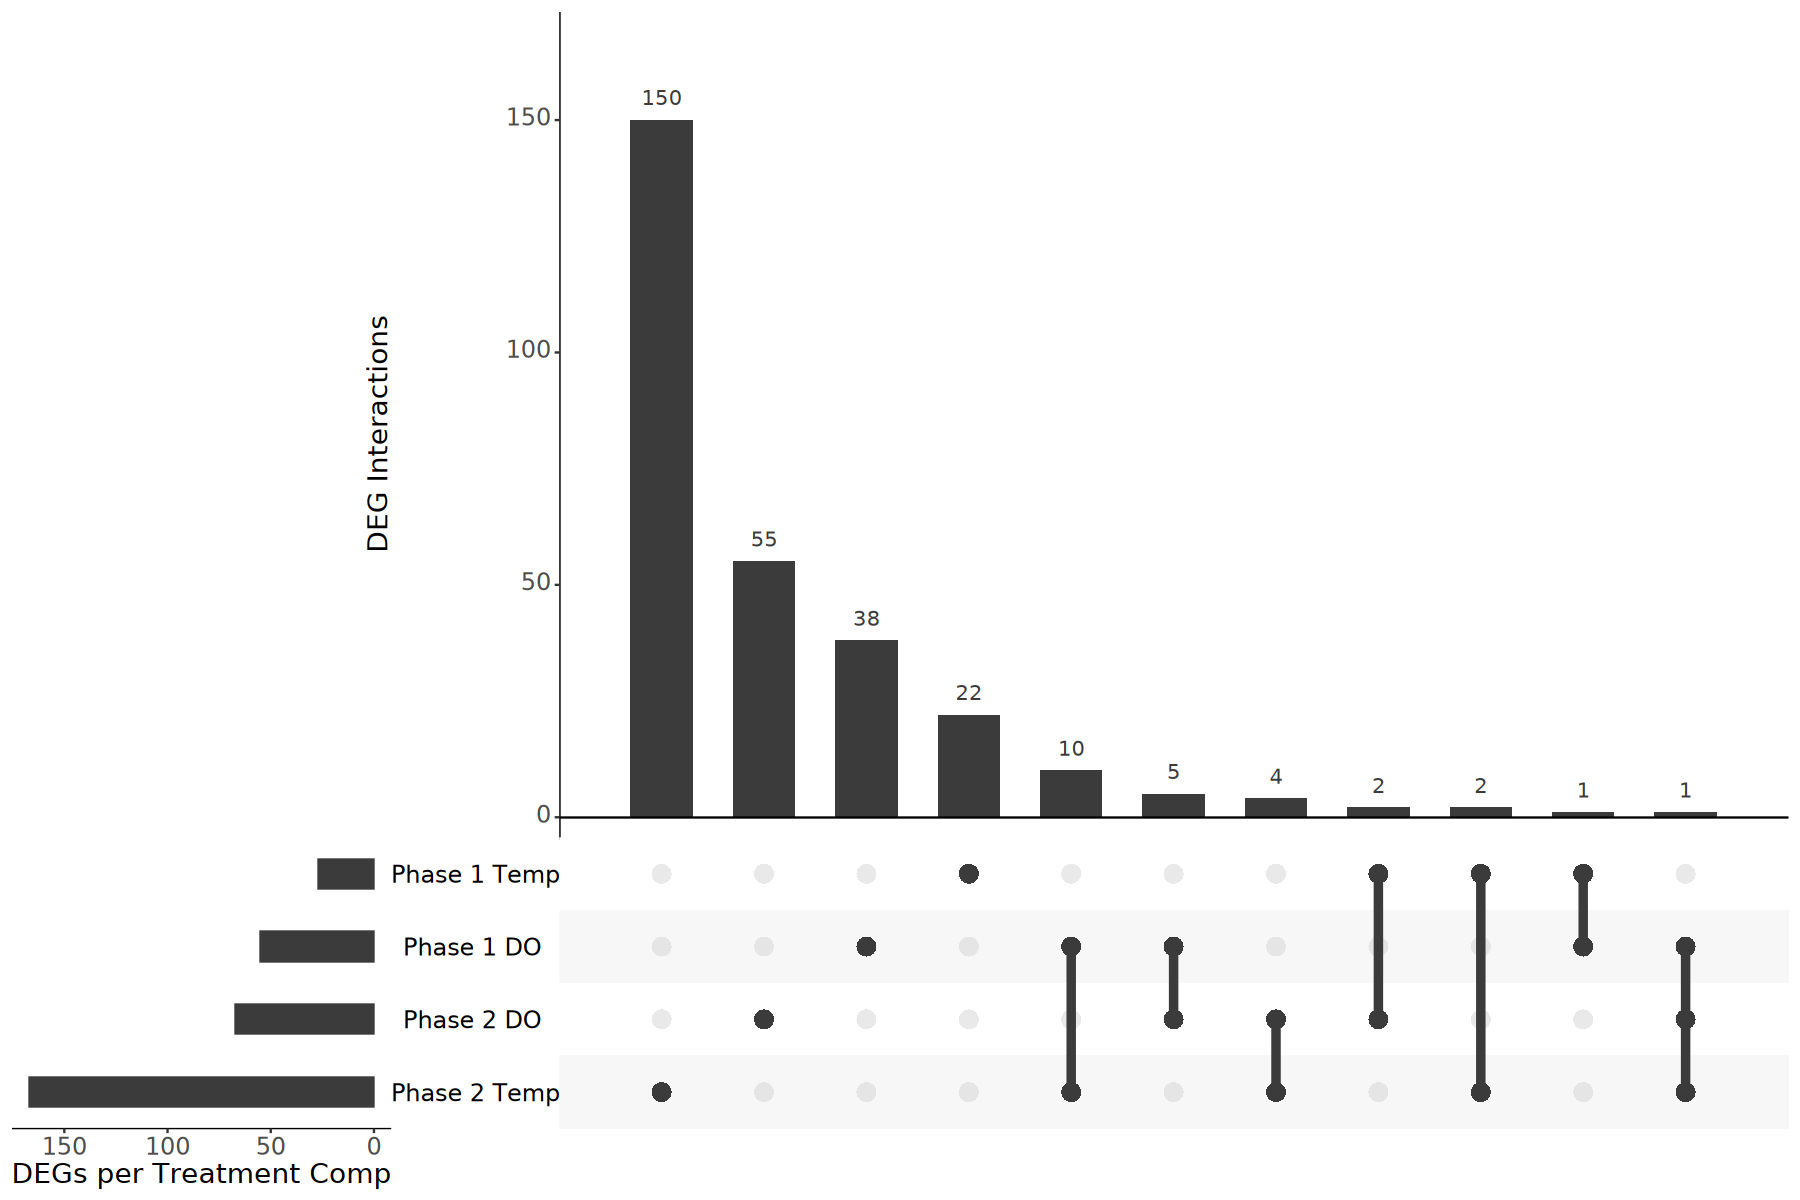

In [29]:
options(repr.plot.width=15, repr.plot.height=10)

# make list for input into upset
deg_comps = list('Phase 1 Temp' = deg_list$p1_temp$Gene,
            'Phase 1 DO' = deg_list$p1_DO$Gene,
            'Phase 2 Temp' = deg_list$p2_temp$Gene,
            'Phase 2 DO' = deg_list$p2_DO$Gene
            )

# plot
deg_upset <- upset(
  fromList(deg_comps),
  nsets = 4,
  order.by = "freq",
  point.size = 5,
  line.size = 2,
  mainbar.y.label = "DEG Interactions",
  sets.x.label = "DEGs per Treatment Comp",
  text.scale = c(2, 2, 2, 2, 2, 2)
)

deg_upset

as expected, phase 2 comparisons result in more DEGs - majority of DEGs are unique to that comparison

what's more surprising is 10 DEGs are shared between P1 DO and P2 temp

### overlap between DEGs and modules

using heatmaps generated in [wgcna_p2.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase2_v_phase2/wgcna/wgcna_p2.ipynb) to identify modules that are significantly correlated with a treatment and looking at the overlap with DEGs

#### midnightblue and green module
associated with phase 1 warm treatment and temperature

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


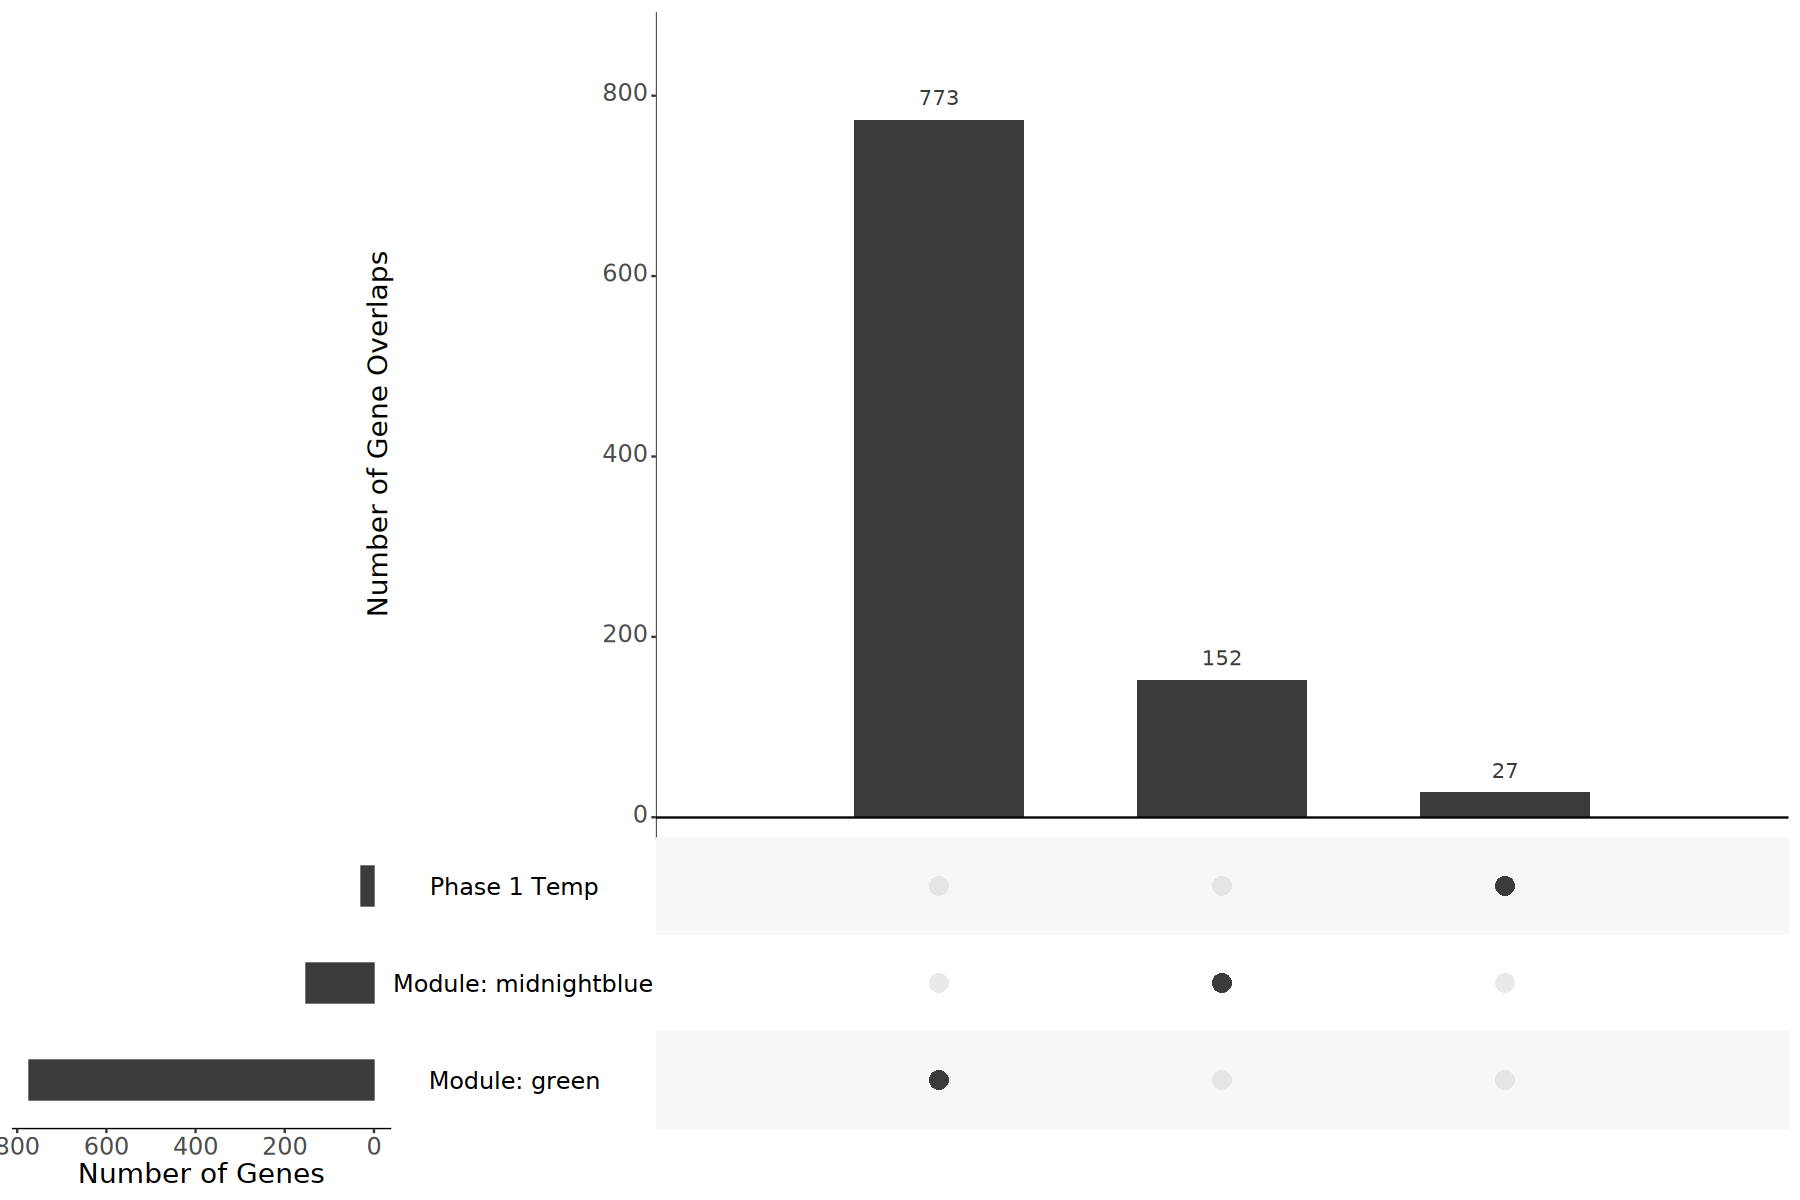

In [32]:
options(repr.plot.width=15, repr.plot.height=10)

# make list for input into upset
p1_temp_modules = list('Phase 1 Temp' = deg_list$p1_temp$Gene,
                'Module: midnightblue' = module_gene_list$midnightblue,
                 'Module: green' = module_gene_list$green                
            )

# plot
upset2 <- upset(
  fromList(p1_temp_modules),
  nsets = 3,
  order.by = "freq",
  point.size = 5,
  line.size = 2,
  mainbar.y.label = "Number of Gene Overlaps",
  sets.x.label = "Number of Genes",
  text.scale = c(2, 2, 2, 2, 2, 2)
)

upset2

no overlap ...

#### yellow, salmon, and magenta modules
associated with phase 2 DO

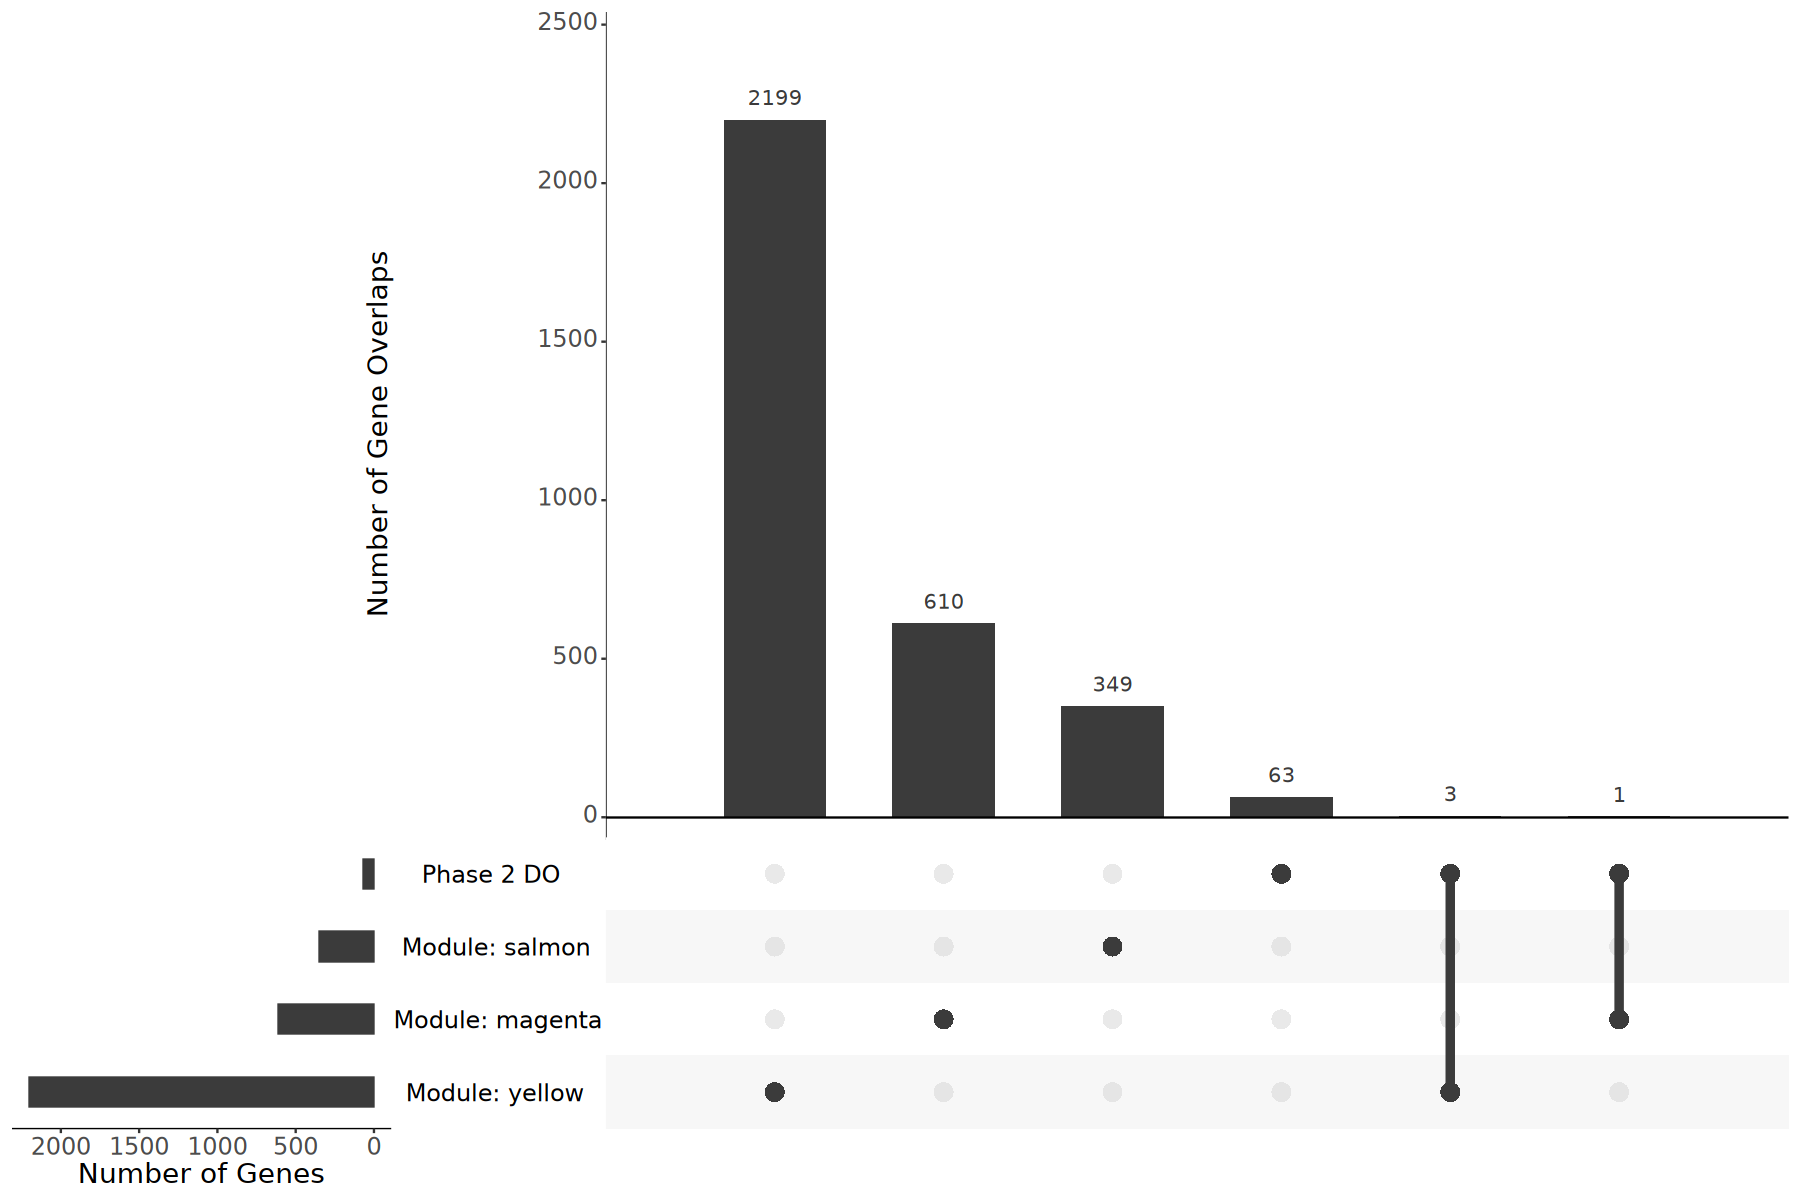

In [33]:
options(repr.plot.width=15, repr.plot.height=10)

# make list for input into upset
p2_DO_modules = list('Phase 2 DO' = deg_list$p2_DO$Gene,
                'Module: yellow' = module_gene_list$yellow,
                 'Module: salmon' = module_gene_list$salmon,
                       'Module: magenta' = module_gene_list$magenta
            )

# plot
upset3 <- upset(
  fromList(p2_DO_modules),
  nsets = 4,
  order.by = "freq",
  point.size = 5,
  line.size = 2,
  mainbar.y.label = "Number of Gene Overlaps",
  sets.x.label = "Number of Genes",
  text.scale = c(2, 2, 2, 2, 2, 2)
)

upset3

3 DEGs from phase 2 normoxic vs. hypoxic are in the yellow module and 1 is in the magenta module

#### cyan, yellow, salmon, turquoise, and magenta modules
associated with phase 2 temp

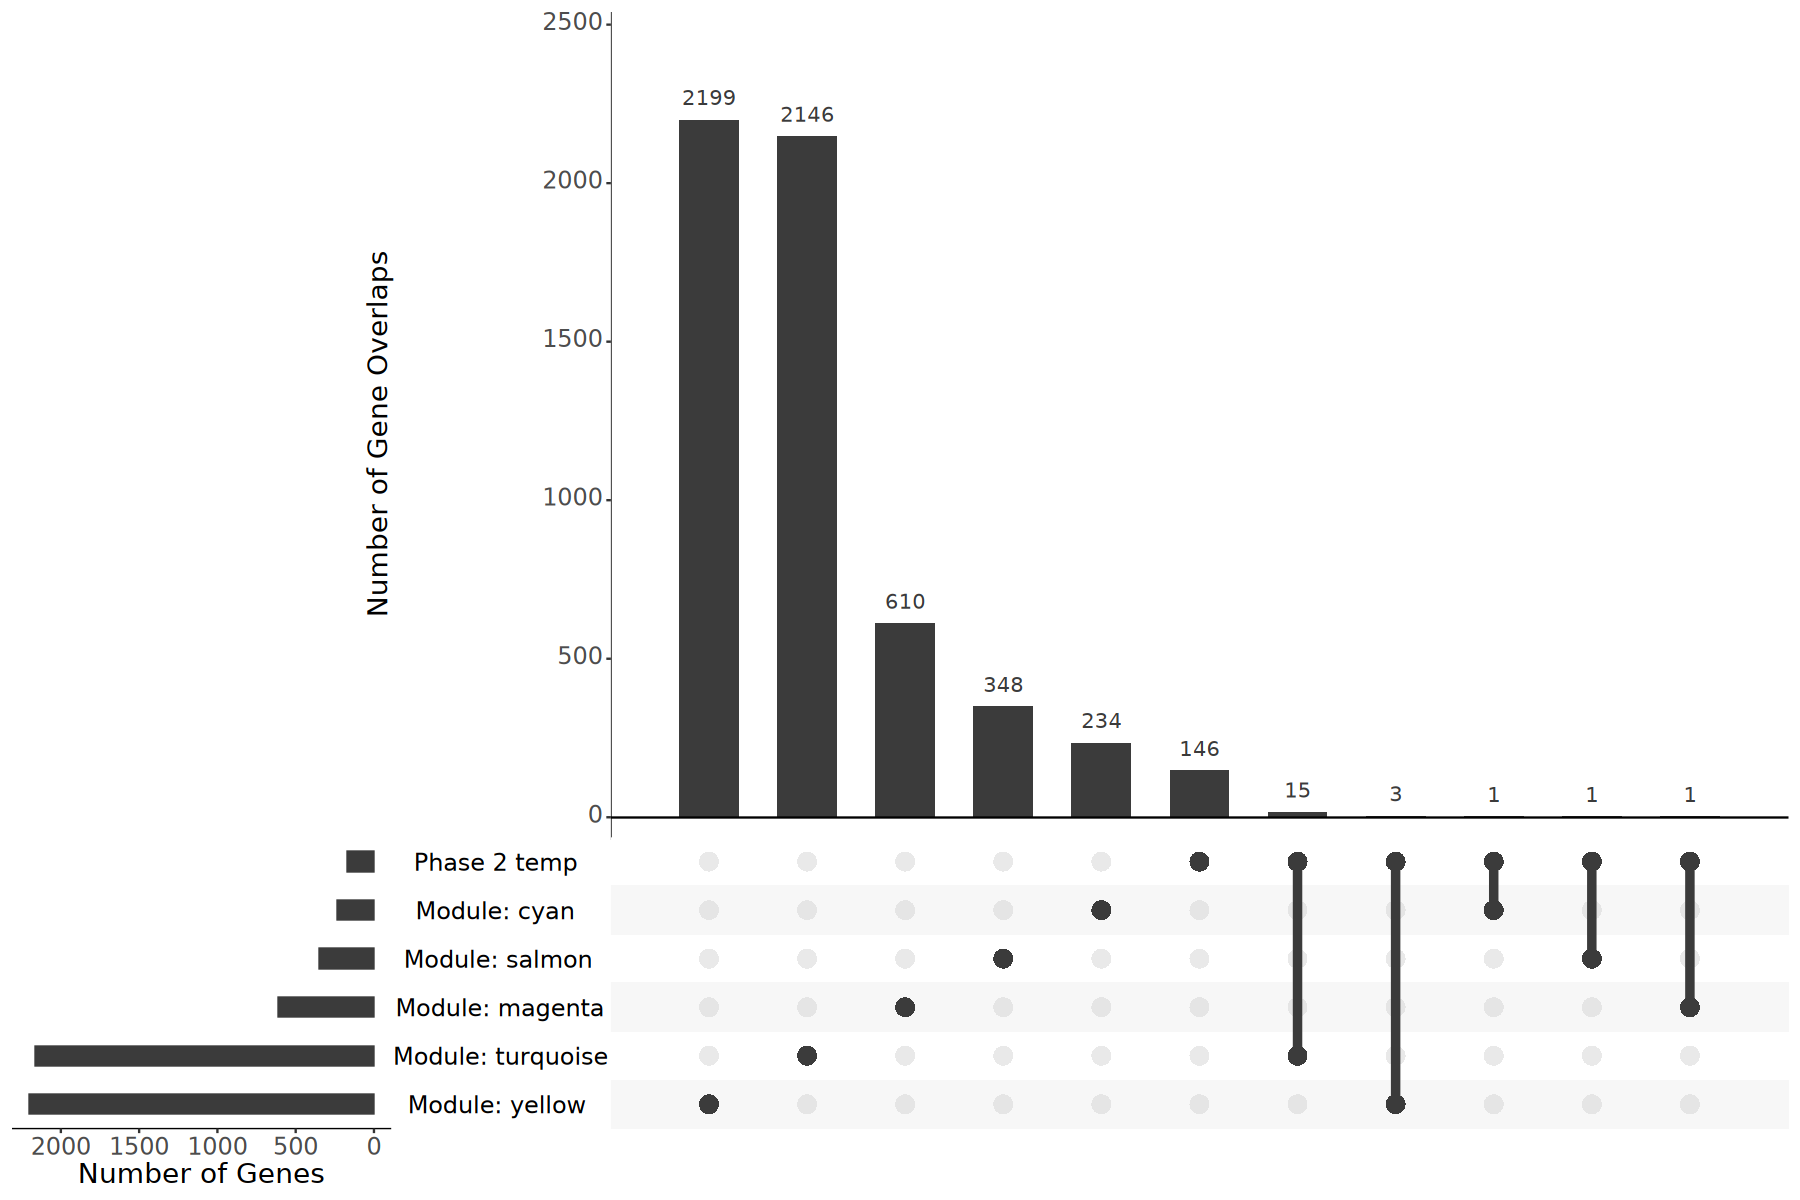

In [34]:
options(repr.plot.width=15, repr.plot.height=10)

# make list for input into upset
p2_temp_modules = list('Phase 2 temp' = deg_list$p2_temp$Gene,
                'Module: yellow' = module_gene_list$yellow,
                 'Module: salmon' = module_gene_list$salmon,
                       'Module: magenta' = module_gene_list$magenta,
                     'Module: cyan' = module_gene_list$cyan,
                     'Module: turquoise' = module_gene_list$turquoise
            )

# plot
upset4 <- upset(
  fromList(p2_temp_modules),
  nsets = 6,
  order.by = "freq",
  point.size = 5,
  line.size = 2,
  mainbar.y.label = "Number of Gene Overlaps",
  sets.x.label = "Number of Genes",
  text.scale = c(2, 2, 2, 2, 2, 2)
)

upset4

15 DEGs from phase 2 warm vs. ambient are in the turquoise module, 3 in the yellow module, 1 in cyan, salmon, and magenta